# Proyek Analisis Data: Bike-sharing-dataset






*   **Nama**: Faruq Farkhan Iskandar
*   **Email**: ruqfaruq30@gmail.com
*   **ID Dicoding:** faruq_farkhan_i_0hwv

##Menentukan Pertanyaan Bisnis





- Analisis Waktu (Tahun): Apakah terjadipeningkatan atau penurunan peminjaman sepeda antara tahun 2011 dan 2012? Apa yang mungkin menjadi penyebabnya?

- Tren Pengguna Terdaftar vs. Kasual: Bagaimana perbandingan jumlah pengguna kasual dengan pengguna terdaftar di sepanjang tahun? Apakah ada perbedaan yang signifikan dalam pola peminjaman?

- Pengaruh Cuaca: Bagaimana kondisi cuaca (clear, mist, rain, snow) memengaruhi jumlah peminjaman sepeda? Apakah ada jenis cuaca tertentu yang meningkatkan atau mengurangi peminjaman?

- Hari Kerja vs Akhir Pekan: Bagaimana perbedaan peminjaman sepeda antara hari kerja dan akhir pekan? Apakah akhir pekan memiliki lebih banyak pengguna kasual dibandingkan pengguna terdaftar?

- Tren Musiman: Bagaimana distribusi peminjaman sepeda pada setiap musim? Apakah ada pola yang jelas dalam peminjaman sepeda selama musim semi, panas, gugur, dan dingin?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Saya menadapatkan data ini dari link download yang di sediakan oleh team dicoding:
https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view

saya download lalu saya paggil dengan command berikut:

In [ ]:
file = r"C:\Users\user\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1\day.csv"
day_data = pd.read_csv(file)
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
file = r"C:\Users\user\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1\hour.csv"
hour_data = pd.read_csv(file)
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Hasil dari gathering data adalah :


*   Data yang saya sudah download bisa saya akses di
notebook dengan memanggil hour_data & day_data


### Assessing Data

Saya akan mencoba asses day_data terlebih dahulu

In [ ]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Disini saya melihat ketidaksesuaian pada data dteday. Akan saya ubah typenya menjadi datetime di bagian "cleaning data".

In [ ]:
day_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada 2 kolom atas, saya melihat bahwa dataset  tidak memiliki nilai yang salah (incorrect value) maupun nilai kosong (null value).

In [ ]:
print(f"jumlah duplikasi = {day_data.duplicated().sum()}")

jumlah duplikasi = 0


Saya juga tidak melihat bahwa data ini memiliki value yang terduplikasi

**Insight:**

Hasil analisa dataset day_data seperti berikut:


*   Memiliki type yang kurang tepat di kolom dteday

*   Tidak memiliki missing column
*   tidak memiliki duplicate data


*   Tidak terdapat inaccurate value



Lalu saya akan melanjutkan untuk mengasses hour_data

In [ ]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti day_data, hour_data juga memiliki ketidaksesuaian pada dteday. Saya akan mengubah typenya menjadi datetime di cleaning data.

In [ ]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
hour_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada 2 kolom atas, saya melihat bahwa dataset  tidak memiliki nilai yang salah (incorrect value) maupun nilai kosong (null value).

In [ ]:
print(f"jumlah data duplicate = {hour_data.duplicated().sum()}")

jumlah data duplicate = 0


Saya juga tidak melihat bahwa data ini memiliki value yang terduplikasi

**Insight:**

Hasil analisa dataset hour_data seperti berikut:


*   Memiliki type yang kurang tepat di kolom dteday

*   Tidak memiliki missing column
*   tidak memiliki duplicate data


*   Tidak terdapat inaccurate value





### Cleaning Data

In [ ]:
# saya melihhat bahwa dteday masih memiliki type object saya mau ubah jadi datetime
day_data["dteday"] = pd.to_datetime(day_data["dteday"])
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Saya merapihkan data type dteday menjadi datetime

In [ ]:
hour_data["dteday"] = pd.to_datetime(hour_data["dteday"])
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Saya merapihkan data type dteday menjadi datetime

**Insight:**

Hasil Dari merapihkan :


*   pada hour_data saya mengubah type dteday menjadi datetime
*   pada day_data saya mengubah type dteday menjadi datetime

## Exploratory Data Analysis (EDA)

### Eksplore

In [ ]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
jumlah_peminjam_2011 = int(day_data[day_data["yr"]==0]["cnt"].sum())
jumlah_peminjam_2012 = int(day_data[day_data["yr"] == 1]["cnt"].sum())

print(f"jumlah peminjam pada tahun 2011 berjumlah {jumlah_peminjam_2011} dan pada tahun 2012 berjumlah {jumlah_peminjam_2012}")

if jumlah_peminjam_2011 > jumlah_peminjam_2012:
    print(f"jumlah peminjam menurun {((jumlah_peminjam_2011-jumlah_peminjam_2012)/jumlah_peminjam_2011) * 100:.2f}%")
else:
    print(f"jumlah peminjam menaik {((jumlah_peminjam_2012-jumlah_peminjam_2011)/jumlah_peminjam_2011) * 100:.2f}%")


jumlah peminjam pada tahun 2011 berjumlah 1243103 dan pada tahun 2012 berjumlah 2049576
jumlah peminjam menaik 64.88%


di tahun 2012 jumlah peminjam sepeda mengalami peningkatan

In [ ]:
day_data['year'] = day_data['dteday'].dt.year

In [ ]:

# Menambahkan kolom 'year' untuk mempermudah analisis per tahun


day_data.groupby(by=[ 'year', pd.Grouper(key='dteday', freq='3MS')]).agg({
    "cnt": "sum",
    "temp": "mean",
    "hum": "mean",
    "casual": "sum",
    "registered": "sum",
    "workingday": "sum",
    "windspeed": "sum"
})



cnt      temp       hum  casual  registered  workingday  \
year dteday                                                                   
2011 2011-01-01  150449  0.270241  0.571664   22141      128308          62   
     2011-04-01  374203  0.580465  0.658904   84008      290195          63   
     2011-07-01  405450  0.693138  0.665576   91839      313611          64   
     2011-10-01  313001  0.399131  0.677115   49264      263737          61   
2012 2012-01-01  364756  0.347331  0.590137   49308      315448          62   
     2012-04-01  572919  0.585725  0.577882  125985      446934          63   
     2012-07-01  636683  0.695562  0.633234  128680      508003          63   
     2012-10-01  475218  0.386889  0.646801   68792      406426          62   

                 windspeed  
year dteday                 
2011 2011-01-01  19.662529  
     2011-04-01  18.291857  
     2011-07-01  15.823709  
     2011-10-01  16.083867  
2012 2012-01-01  19.229592  
     2012-04-01  18.247585  
     2012-07-01  15.149571  
     2012-10-01  16.756710

Disini saya mencoba melihat rata" dan jumlah yang saya kelompokan berdasarkan frequensi perquarter

In [ ]:
day_data.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830,0.866025
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830,0.866025
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100,-0.001844
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710,1.000000
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977,-0.001792
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348,0.007954
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443,-0.005461
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156,-0.002013
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391,-0.048727
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494,0.047604


Analisis Waktu (Tahun): Apakah terjadi peningkatan atau penurunan peminjaman sepeda antara tahun 2011 dan 2012? Apa yang mungkin menjadi penyebabnya?

Saya melihat bahwa jumlah peminjam pada tahun 2012 naik sebesar  64.88%.
saya melihat temperatur & humidty pada tahun 2012 dan 2011 tidak berbeda significant.
Namun terdapat perbedaan signifikan pada jumlah total peminjam, kemungkinan hal ini disebabkan penyewaan sepeda semakin dikenal oleh masyarakat luas.

2. Tren Pengguna Terdaftar vs. Kasual: Bagaimana perbandingan jumlah pengguna kasual dengan pengguna terdaftar di sepanjang tahun? Apakah ada perbedaan yang signifikan dalam pola peminjaman?

In [ ]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011


In [ ]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
pagi= 4-10
siang= 11-15
sore= 16-19
malam= 20-3

In [ ]:
hour_data['year'] = hour_data['dteday'].dt.year
hour_data["waktu"] = hour_data.hr.apply(lambda x: "pagi" if x <= 10 and x >= 4 else ("siang" if x >= 11 and x <=15 else ("sore" if x>=16 and x <=19 else "malam")))

In [ ]:
hour_data.groupby(by=[pd.Grouper(key='dteday', freq='1ME'), "waktu"]).agg({
    "casual":"sum",
    "registered":"sum"
})



casual  registered
dteday     waktu                    
2011-01-31 malam     410        5229
           pagi      391        9165
           siang    1446        8918
           sore      826       11804
2011-02-28 malam     672        6899
...                  ...         ...
2012-11-30 sore     5191       42881
2012-12-31 malam    1426       16032
           pagi     1740       29538
           siang    6788       29739
           sore     3291       35159

[96 rows x 2 columns]

4. Hari Kerja vs Akhir Pekan: Bagaimana perbedaan peminjaman sepeda antara hari kerja dan akhir pekan? Apakah akhir pekan memiliki lebih banyak pengguna kasual dibandingkan pengguna terdaftar?

Pada kolom diatas saya mencoba untuk mengelompokan data berdasarkan waktunya.

In [ ]:
day_data.groupby(by=["workingday","weekday"]).agg({
    "casual":"sum",
    "registered":"sum"
})

casual  registered
workingday weekday                    
0          0        140521      303506
           1         16760       42845
           2           440         573
           3          2562        4841
           4          1515        2405
           5          1082        5412
           6        153852      323955
1          1         54024      341874
           2         57403      410693
           3         54757      410888
           4         59945      421530
           5         77156      404140

In [ ]:
day_data.groupby(by="weekday").agg({
    "casual":"sum",
    "registered":"sum"
})

,casual,registered
weekday,,
0,140521,303506
1,70784,384719
2,57843,411266
3,57319,415729
4,61460,423935
5,78238,409552
6,153852,323955


5. Tren Musiman: Bagaimana distribusi peminjaman sepeda pada setiap musim? Apakah ada pola yang jelas dalam peminjaman sepeda selama musim semi, panas, gugur, dan dingin?


In [ ]:
day_data.groupby(by=["year","season"]).agg({
    "casual": ["sum","max", "min"],
    "registered": ["sum","max", "min"]
})

casual            registered            
                sum   max  min        sum   max   min
year season                                          
2011 1        21425  1424    9     128575  2841   416
     2        77564  2355  121     269752  4414   674
     3        95450  3065  118     324200  4614   889
     4        52813  2397   50     273324  4372   570
2012 1        39197  3155    9     282151  5315   432
     2       125958  3410  120     445315  6456   907
     3       130641  3160  371     510838  6917  3195
     4        76969  3031    2     438507  6946    20

dari hasil penilaian casual vs register berdasarkan pola musiman dan hari kerja kita dapat mengetahui beberapa poin:
1. pelanggan register lebih sering meminjam, mungkin disebabkan kebutuhan entah itu digunakan untuk ke transportasi umum atau pun pergi berbelanja
2. pada hari sabtu & minggu pelanggan casual akan terjadi peningkatan dimana hal ini di sebabkan hari tersebut merupakan hari libur
3. kita dapat melihat terdapat pola dimana saat season = 3 (fall) akan terjadi titik tertinggi peminjam baik casual maupun registered &
titik terendah pada saat season = 1 (spring)
4. siang hari akan selalu menjadi titik waktu terbanyak peminjam

3. Pengaruh Cuaca: Bagaimana kondisi cuaca (clear, mist, rain, snow) memengaruhi jumlah peminjaman sepeda? Apakah ada jenis cuaca tertentu yang meningkatkan atau mengurangi peminjaman?

In [ ]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,waktu
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011,malam
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011,malam
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011,malam
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011,malam
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011,pagi


In [ ]:
hour_data.groupby(by="weathersit").agg({
    "cnt":"sum"
})


,cnt
weathersit,
1,2338173
2,795952
3,158331
4,223


**Insight:**

untuk proses eksploratory data saya menemukan bahwa:


*   Jumlah peminjam pada tahun 2012 naik sebesar  64.88%.

*   Temperatur & humidty pada tahun 2012 dan 2011 tidak berbeda significant.

*   Terdapat perbedaan signifikan pada jumlah total peminjam, kemungkinan hal ini disebabkan penyewaan sepeda semakin dikenal oleh masyarakat luas.
*   Pelanggan register lebih sering meminjam, mungkin disebabkan kebutuhan entah itu digunakan untuk ke transportasi umum atau pun pergi berbelanja.


*   Pada hari sabtu & minggu pelanggan casual akan terjadi peningkatan dimana hal ini di sebabkan hari tersebut merupakan hari libur


*   Kita dapat melihat terdapat pola dimana saat season = 3 (fall) akan terjadi titik tertinggi peminjam baik casual maupun registered &titik terendah pada saat season = 1 (spring)



*   Siang hari akan selalu menjadi titik waktu terbanyak peminjam
*   Menurut wheater, cuaca 1 (clear) menjadi paling banyak


## Visualization & Explanatory Analysis

Saya akan membuat chart seperti ini untuk menjelaskan pertanyaan analisis ini

1.

a.pie chart akan memvisualkan berapa persen perbandingan peminjaman sepeda pada tahun 2011 dan 2012

b.Line chart akan memvisualkan bagaimana peningkatan peminjaman sepeda pada tahun 2011 dan 2012 berdasarkan per 1 bulan  

2.

a. clustered bar chart membandingakn casual & register per 3 bulan selama 2 tahun

b. membuat linechart untuk membandingkan casual & register untuk 1 hari selama 1 bulan

3.
a. pie chart peminjaman berdasarkan data cuaca

4.

a. pie chart berdasarkan hari kerja

b. pir chart berdasarkan akhir pekan

5.
a. membandingkan tren musim menggunakan line chart berdasarkan per 3 bulan

### Pertanyaan 1:

Analisis Waktu (Tahun): Apakah terjadi peningkatan atau penurunan peminjaman sepeda antara tahun 2011 dan 2012? Apa yang mungkin menjadi penyebabnya?

-pie chart akan memvisualkan berapa persen perbandingan peminjaman sepeda pada tahun 2011 dan 2012

In [ ]:
jumlah_peminjam = hour_data.resample(rule='YE', on='dteday').agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum"
})

jumlah_peminjam.index = jumlah_peminjam.index.strftime('%Y')
jumlah_peminjam = jumlah_peminjam.reset_index()
jumlah_peminjam.head()

,dteday,registered,casual,cnt
0,2011,995851,247252,1243103
1,2012,1676811,372765,2049576


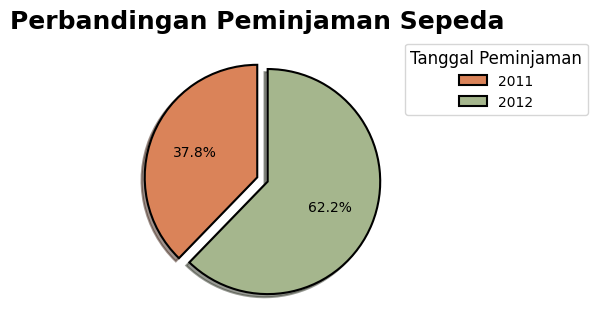

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))


explode = (0, 0.1)

# Pie chart dengan tambahan informasi persentase
plt.pie(jumlah_peminjam["cnt"],
        autopct='%1.1f%%',  # Format persentase
        colors=["#DA8359", "#A5B68D"],
        shadow=True,
        explode=explode,
        startangle=90,  # Memulai pie chart dari sudut 90 derajat
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})  # Menambahkan garis tepi

# Judul grafik
ax.set_title("Perbandingan Peminjaman Sepeda", size=18, fontweight='bold')

# Menambahkan legend di luar pie chart dan menyesuaikan posisi
plt.legend(labels=jumlah_peminjam['dteday'],
           loc='upper left',
           bbox_to_anchor=(1, 1),  # Menempatkan legend di luar chart
           title="Tanggal Peminjaman", fontsize=10, title_fontsize=12)

# Menambahkan grid ringan agar chart terlihat lebih rapi
plt.grid(axis='y', alpha=0.3)

# Menampilkan pie chart
plt.tight_layout()  # Untuk menghindari potongan legend dan grafik
plt.show()


1. Analisis Waktu (Tahun): Apakah terjadi peningkatan atau penurunan peminjaman sepeda antara tahun 2011 dan 2012? Apa yang mungkin menjadi penyebabnya?
-Line chart akan memvisualkan bagaimana peningkatan peminjaman sepeda pada tahun 2011 dan 2012 berdasarkan per 1 bulan

In [ ]:
jumlah_peminjam = hour_data.resample(rule='1ME', on='dteday').agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum"
})

jumlah_peminjam.index = jumlah_peminjam.index.strftime('%Y - %m')
jumlah_peminjam = jumlah_peminjam.reset_index()
jumlah_peminjam.head()

,dteday,registered,casual,cnt
0,2011 - 01,35116,3073,38189
1,2011 - 02,41973,6242,48215
2,2011 - 03,51219,12826,64045
3,2011 - 04,72524,22346,94870
4,2011 - 05,104771,31050,135821


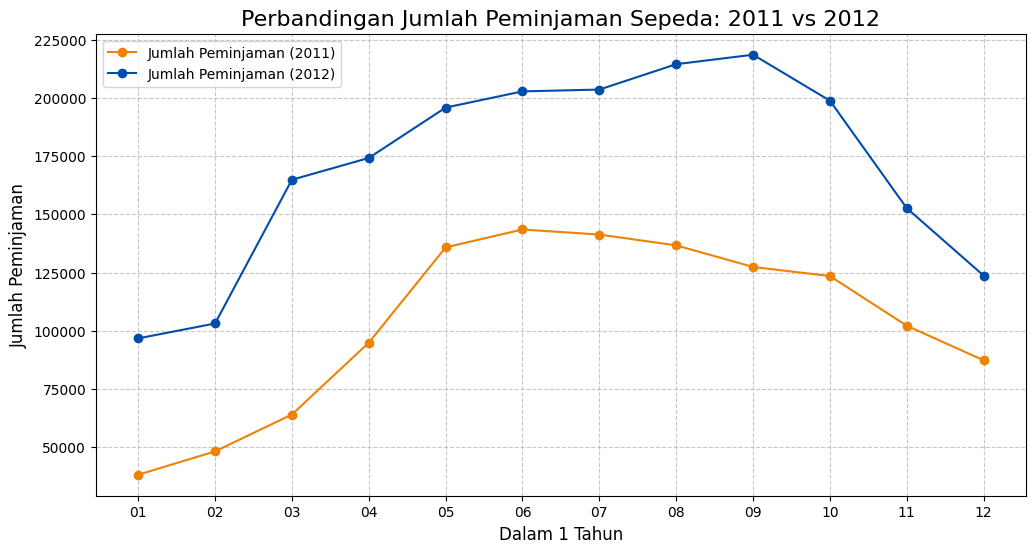

In [ ]:
# Ambil hanya data dari 2011 dan 2012
jumlah_peminjam_filtered = jumlah_peminjam[jumlah_peminjam['dteday'].str.startswith(('2011', '2012'))]

# Tambahkan kolom 'periode' untuk menyamakan bulan & triwulan antar tahun
jumlah_peminjam_filtered['periode'] = jumlah_peminjam_filtered['dteday'].str[-2:]  # Ambil bulan

# Pisahkan data berdasarkan tahun
data_2011 = jumlah_peminjam_filtered[jumlah_peminjam_filtered['dteday'].str.startswith('2011')]
data_2012 = jumlah_peminjam_filtered[jumlah_peminjam_filtered['dteday'].str.startswith('2012')]
colors=["#024CAA","#EC8305"]
# Plot
plt.figure(figsize=(12, 6))

# Line untuk 2011
plt.plot(data_2011['periode'], data_2011['cnt'],
         label='Jumlah Peminjaman (2011)', color=colors[1], marker='o', linestyle='-', linewidth=1.5)

# Line untuk 2012
plt.plot(data_2012['periode'], data_2012['cnt'],
         label='Jumlah Peminjaman (2012)', color=colors[0], marker='o', linestyle='-', linewidth=1.5)

# Judul dan Label
plt.title('Perbandingan Jumlah Peminjaman Sepeda: 2011 vs 2012', size=16)
plt.xlabel('Dalam 1 Tahun', size=12)
plt.ylabel('Jumlah Peminjaman', size=12)
plt.xticks(data_2011['periode'], fontsize=10)  # Menggunakan label bulan
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### Pertanyaan 2:


Tren Pengguna Terdaftar vs. Kasual: Bagaimana perbandingan jumlah pengguna kasual dengan pengguna terdaftar di sepanjang tahun? Apakah ada perbedaan yang signifikan dalam pola peminjaman?

-clustered bar chart membandingakn casual & register per 3 bulan selama 2 tahun

In [ ]:
data_quartal = hour_data.resample(rule='3ME', on='dteday').agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum"
})

data_quartal.index = data_quartal.index.strftime('%Y -  %m')
data_quartal = data_quartal.reset_index()
data_quartal['month'] = data_quartal['dteday'].str[-2:]
# data_quartal
data_quartal['quarter'] = data_quartal['month'].astype(int).apply(
    lambda x: 'Q1' if x in [1, 2, 3] else
              'Q2' if x in [4, 5, 6] else
              'Q3' if x in [7, 8, 9] else
              'Q4'
)

# data_2011_quartal = data_quartal[data_quartal['dteday'].str.startswith('2011')]
# data_2012_quartal = data_quartal[data_quartal['dteday'].str.startswith('2012')]
# data_2012_quartal.head()


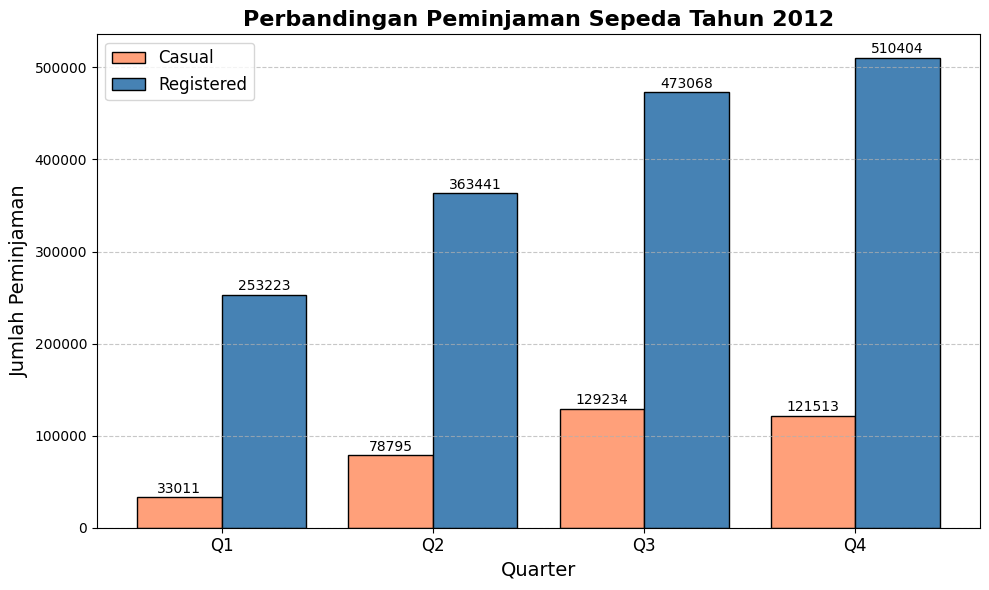

In [ ]:
# Variabel tahun untuk filter
tahun = "2012"  # Ubah ini untuk mengganti tahun

# Filter data berdasarkan tahun
data_tahun = data_quartal[data_quartal['dteday'].str.startswith(tahun)]

# Konfigurasi plotting
width = 0.4
x = np.arange(len(data_tahun))  # Posisi untuk bar

plt.figure(figsize=(10, 6))  # Ukuran grafik
plt.bar(x - width / 2, data_tahun["casual"], width, label="Casual", color="#FFA07A", edgecolor="black")
plt.bar(x + width / 2, data_tahun["registered"], width, label="Registered", color="#4682B4", edgecolor="black")

# Tambahkan label, grid, dan judul
plt.xticks(x, data_tahun["quarter"], fontsize=12)  # Menampilkan quarter
plt.xlabel("Quarter", fontsize=14)
plt.ylabel("Jumlah Peminjaman", fontsize=14)
plt.title(f"Perbandingan Peminjaman Sepeda Tahun {tahun}", fontsize=16, fontweight="bold")
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Tambahkan grid horizontal

# Tambahkan angka di atas bar
for i, casual in enumerate(data_tahun["casual"]):
    plt.text(i - width / 2, casual + 5000, f"{casual}", ha="center", fontsize=10, color="black")
for i, registered in enumerate(data_tahun["registered"]):
    plt.text(i + width / 2, registered + 5000, f"{registered}", ha="center", fontsize=10, color="black")

# Tampilkan grafik
plt.tight_layout()
plt.show()


Tren Pengguna Terdaftar vs. Kasual: Bagaimana perbandingan jumlah pengguna kasual dengan pengguna terdaftar di sepanjang tahun? Apakah ada perbedaan yang signifikan dalam pola peminjaman?

b. membuat linechart untuk membandingkan casual & register untuk 1 hari selama 1 bulan

In [ ]:
data_per_bulan = day_data.resample(rule='1D', on='dteday').agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum"
})
data_per_bulan.index = data_per_bulan.index.strftime('%Y-%m-%d')
data_per_bulan = data_per_bulan.reset_index()
data_per_bulan['day'] = data_per_bulan['dteday'].str[-2:]
data_per_bulan["hari libur"]= day_data["workingday"]
data_per_bulan.tail()

,dteday,registered,casual,cnt,day,hari libur
726,2012-12-27,1867,247,2114,27,1
727,2012-12-28,2451,644,3095,28,1
728,2012-12-29,1182,159,1341,29,0
729,2012-12-30,1432,364,1796,30,0
730,2012-12-31,2290,439,2729,31,1


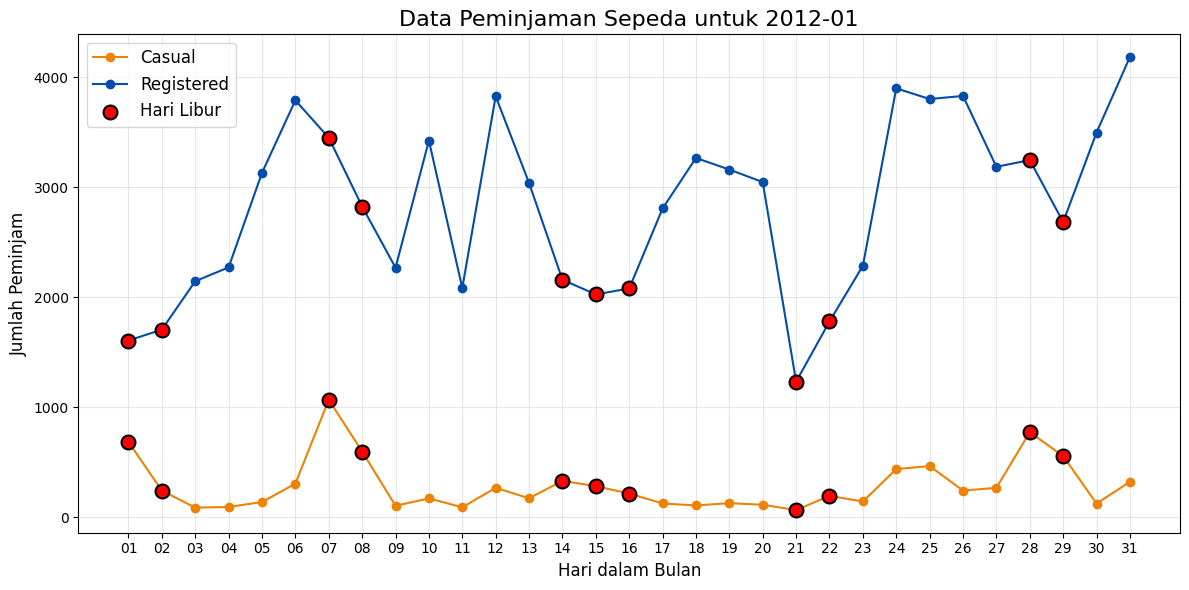

In [ ]:
# Filter data berdasarkan bulan dan tahun
tahun_bulan = "2012-01"
data_tahun_bulan = data_per_bulan[data_per_bulan['dteday'].str.startswith(tahun_bulan)]

# Membuat figure untuk plot
plt.figure(figsize=(12, 6))

# Plot data Casual
plt.plot(data_tahun_bulan["day"], data_tahun_bulan["casual"],
         label='Casual', color=colors[1], marker='o', linestyle='-', linewidth=1.5)

# Plot data Registered
plt.plot(data_tahun_bulan["day"], data_tahun_bulan["registered"],
         label='Registered', color=colors[0], marker='o', linestyle='-', linewidth=1.5)

# Highlight hari libur dengan marker merah dengan outline
for idx, row in data_tahun_bulan.iterrows():
    if row["hari libur"] == 0:  # Jika hari libur
        # Casual
        plt.scatter(row["day"], row["casual"],
                    color='red', edgecolor='black', linewidth=1.5, s=100, zorder=5)
        # Registered
        plt.scatter(row["day"], row["registered"],
                    color='red', edgecolor='black', linewidth=1.5, s=100, zorder=5)

# Menambahkan judul, label, dan elemen lainnya
plt.scatter([], [], color='red', edgecolor='black', linewidth=1.5, s=100, label="Hari Libur")
plt.title(f"Data Peminjaman Sepeda untuk {tahun_bulan}", fontsize=16)
plt.xlabel("Hari dalam Bulan", fontsize=12)
plt.ylabel("Jumlah Peminjam", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Tampilkan plot
plt.tight_layout()
plt.show()


### Pertanyaan 3:

3.
a. pie chart peminjaman berdasarkan data cuaca

In [ ]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,waktu
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011,malam
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011,malam
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011,malam
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011,malam
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011,pagi


In [ ]:
# Menggunakan groupby untuk menghitung sum dan std berdasarkan 'dteday' (berdasarkan bulan) dan 'weathersit'
data_cuaca = hour_data.groupby([pd.Grouper(key='dteday', freq='1ME'), "weathersit"]).agg({
    "cnt": ["sum", "std"]
})

data_cuaca['cnt', 'std'] = data_cuaca['cnt', 'std'].fillna(0)


# Reset index untuk memindahkan 'dteday' dan 'weathersit' ke kolom biasa
data_cuaca = data_cuaca.reset_index()


# Menampilkan hasil
data_cuaca.head()


dteday weathersit    cnt           
                           sum        std
0 2011-01-31          1  24086  49.906170
1 2011-01-31          2  12470  48.925093
2 2011-01-31          3   1597  25.959839
3 2011-01-31          4     36   0.000000
4 2011-02-28          1  33271  66.087367

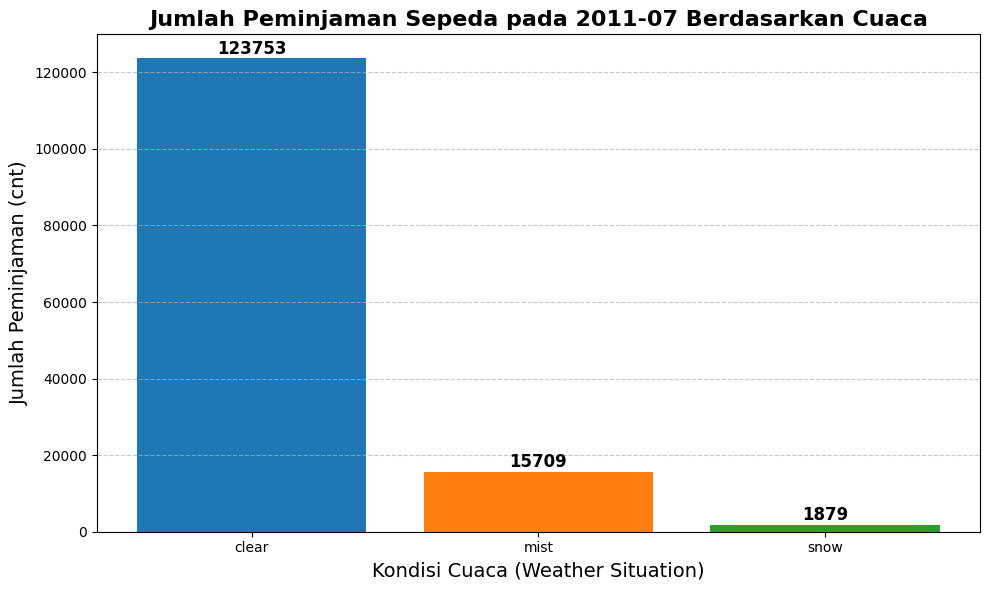

In [ ]:
# Pastikan 'dteday' bertipe string agar bisa diproses dengan str.startswith()
data_cuaca['dteday'] = data_cuaca['dteday'].astype(str)

# Menambahkan kolom 'cuaca' berdasarkan kode weathersit
data_cuaca['cuaca'] = data_cuaca['weathersit'].astype(int).apply(
    lambda x: 'clear' if x == 1 else
              'mist' if x == 2 else
              'rain' if x == 4 else
              'snow'
)

# Filter data untuk bulan tertentu
tahun_bulan = "2011-07"
data_cuaca_perbulan = data_cuaca[data_cuaca['dteday'].str.startswith(tahun_bulan)]

# Pilih kolom yang sesuai untuk perhitungan 'cnt' berdasarkan 'sum'
plt.figure(figsize=(10, 6))

# Set warna untuk setiap kategori cuaca
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Bar chart menggunakan kolom 'cnt' yang sudah di-group
bars = plt.bar(data_cuaca_perbulan["cuaca"], data_cuaca_perbulan[('cnt', 'sum')], color=colors)



# Menambahkan angka di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, f'{yval:.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Menambahkan label dan judul
plt.title(f'Jumlah Peminjaman Sepeda pada {tahun_bulan} Berdasarkan Cuaca', fontsize=16, fontweight='bold')
plt.xlabel('Kondisi Cuaca (Weather Situation)', fontsize=14)
plt.ylabel('Jumlah Peminjaman (cnt)', fontsize=14)

# Menambahkan grid untuk sumbu Y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


### Pertanyaan 4

Hari Kerja vs Akhir Pekan: Bagaimana perbedaan peminjaman sepeda antara hari kerja dan akhir pekan? Apakah akhir pekan memiliki lebih banyak pengguna kasual dibandingkan pengguna terdaftar?

a. pie chart berdasarkan hari kerja

b. pir chart berdasarkan akhir pekan

In [ ]:
data_berdasarkan_working_day = hour_data.groupby(by=[pd.Grouper(key='dteday', freq='1ME'), "workingday"]).agg({
    "casual":"sum",
    "registered":"sum"
})

data_berdasarkan_working_day = data_berdasarkan_working_day.reset_index()
data_berdasarkan_working_day["dteday"]=data_berdasarkan_working_day["dteday"].astype(str)
data_berdasarkan_working_day.head()

,dteday,workingday,casual,registered
0,2011-01-31,0,1680,9500
1,2011-01-31,1,1393,25616
2,2011-02-28,0,3623,10991
3,2011-02-28,1,2619,30982
4,2011-03-31,0,6384,10624


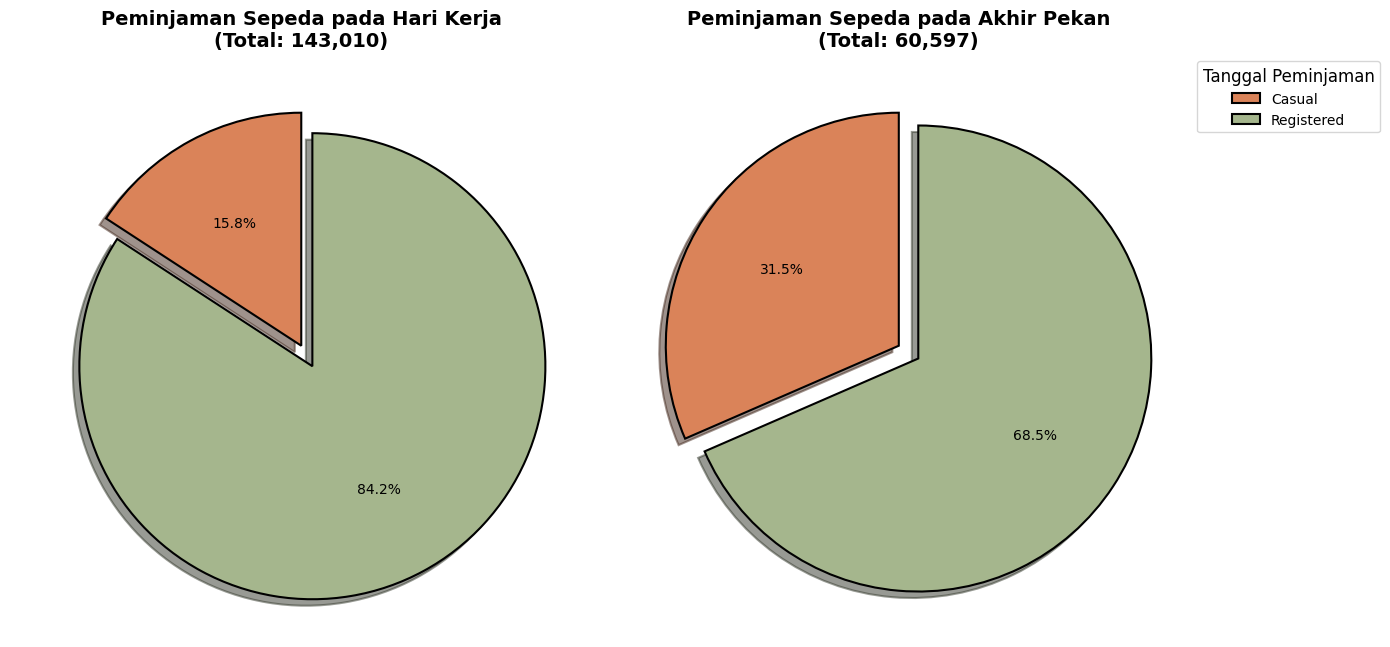

In [ ]:
##perbulan
# Filter data untuk bulan tertentu
tahun_bulan = "2012-07"
data_berdasarkan_working_day_perbulan = data_berdasarkan_working_day[
    data_berdasarkan_working_day['dteday'].str.startswith(tahun_bulan)
]

# Pisahkan data untuk hari kerja dan akhir pekan
data_hari_kerja = data_berdasarkan_working_day_perbulan[
    data_berdasarkan_working_day_perbulan['workingday'] == 1
]
data_akhir_pekan = data_berdasarkan_working_day_perbulan[
    data_berdasarkan_working_day_perbulan['workingday'] == 0
]


# Data untuk pie chart

hari_kerja_sizes = [
    data_hari_kerja["casual"].values[0] if not data_hari_kerja.empty else 0,
    data_hari_kerja["registered"].values[0] if not data_hari_kerja.empty else 0
]

akhir_pekan_sizes = [
    data_akhir_pekan["casual"].values[0] if not data_akhir_pekan.empty else 0,
    data_akhir_pekan["registered"].values[0] if not data_akhir_pekan.empty else 0
]

total_hari_kerja = sum(hari_kerja_sizes)
total_akhir_pekan = sum(akhir_pekan_sizes)
# Membuat pie chart
fig, axes = plt.subplots(1, 2, figsize=(14, 7))



# Pie chart untuk Hari Kerja
axes[0].pie(hari_kerja_sizes,
            autopct='%1.1f%%',
            colors=["#DA8359", "#A5B68D"],
             explode=explode,
            shadow=True,
            startangle=90,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
axes[0].set_title(f'Hari Kerja - {tahun_bulan}', fontsize=14, fontweight='bold')
axes[0].set_title(f'Peminjaman Sepeda pada Hari Kerja\n(Total: {total_hari_kerja:,})', fontsize=14, fontweight='bold')


# Pie chart untuk Akhir Pekan
axes[1].pie(akhir_pekan_sizes,
            autopct='%1.1f%%',
            colors=["#DA8359", "#A5B68D"],
             explode=explode,
            shadow=True,
            startangle=90,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
axes[1].set_title(f'Akhir Pekan - {tahun_bulan}', fontsize=14, fontweight='bold')
axes[1].set_title(f'Peminjaman Sepeda pada Akhir Pekan\n(Total: {total_akhir_pekan:,})', fontsize=14, fontweight='bold')

plt.legend(labels=['Casual', 'Registered'],
           loc='upper left',
           bbox_to_anchor=(1, 1),  # Menempatkan legend di luar chart
           title="Tanggal Peminjaman", fontsize=10, title_fontsize=12)

# Tampilkan chart
plt.tight_layout()
plt.show()


In [ ]:
data_berdasarkan_working_day = hour_data.groupby(by=[pd.Grouper(key='dteday', freq='1ME'), "workingday"]).agg({
    "casual":"sum",
    "registered":"sum"
})

data_berdasarkan_working_day = data_berdasarkan_working_day.reset_index()
data_berdasarkan_working_day["dteday"]=data_berdasarkan_working_day["dteday"].astype(str)
data_berdasarkan_working_day.head()

,dteday,workingday,casual,registered
0,2011-01-31,0,1680,9500
1,2011-01-31,1,1393,25616
2,2011-02-28,0,3623,10991
3,2011-02-28,1,2619,30982
4,2011-03-31,0,6384,10624


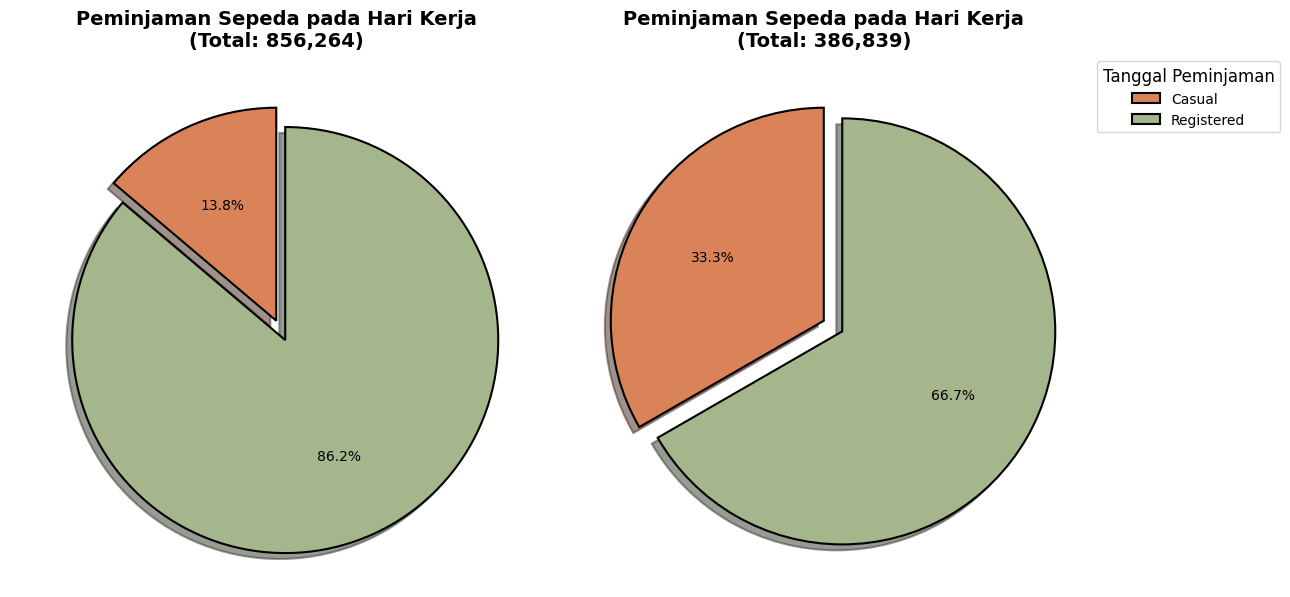

In [ ]:


# Data untuk hari kerja (workingday == 1) dan akhir pekan (workingday == 0)
tahun = "2011"
data_berdasarkan_working_day_pertahun = data_berdasarkan_working_day[
    data_berdasarkan_working_day['dteday'].str.startswith(tahun)
]

data_hari_kerja = data_berdasarkan_working_day_pertahun[data_berdasarkan_working_day_pertahun['workingday'] == 1]
data_akhir_pekan = data_berdasarkan_working_day_pertahun[data_berdasarkan_working_day_pertahun['workingday'] == 0]

# Agregasi jumlah peminjaman casual dan registered untuk hari kerja
hari_kerja_casual = data_hari_kerja['casual'].sum()
hari_kerja_registered = data_hari_kerja['registered'].sum()
hari_kerja_labels = ['Casual', 'Registered']
hari_kerja_sizes = [hari_kerja_casual, hari_kerja_registered]

# Agregasi jumlah peminjaman casual dan registered untuk akhir pekan
akhir_pekan_casual = data_akhir_pekan['casual'].sum()
akhir_pekan_registered = data_akhir_pekan['registered'].sum()
akhir_pekan_labels = ['Casual', 'Registered']
akhir_pekan_sizes = [akhir_pekan_casual, akhir_pekan_registered]

# Membuat figure dan dua subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(13, 20))
# Menambahkan jumlah total untuk hari kerja dan akhir pekan
total_hari_kerja = sum(hari_kerja_sizes)
total_akhir_pekan = sum(akhir_pekan_sizes)





# # Pie chart untuk hari kerja
axes[0].pie(hari_kerja_sizes, autopct='%1.1f%%',  # Format persentase
        colors=["#DA8359", "#A5B68D"],
        shadow=True,
        explode=explode,
        startangle=90,  # Memulai pie chart dari sudut 90 derajat
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

axes[0].set_title('Peminjaman Sepeda pada Hari Kerja', fontsize=14, fontweight='bold')
axes[0].set_title(f'Peminjaman Sepeda pada Hari Kerja\n(Total: {total_hari_kerja:,})', fontsize=14, fontweight='bold')


# # Pie chart untuk akhir pekan
axes[1].pie(akhir_pekan_sizes, autopct='%1.1f%%',  # Format persentase
        colors=["#DA8359", "#A5B68D"],
        shadow=True,
        explode=explode,
        startangle=90,  # Memulai pie chart dari sudut 90 derajat
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

axes[1].set_title('Peminjaman Sepeda pada Akhir Pekan', fontsize=14, fontweight='bold')

axes[1].set_title(f'Peminjaman Sepeda pada Hari Kerja\n(Total: {total_akhir_pekan:,})', fontsize=14, fontweight='bold')
plt.legend(labels=akhir_pekan_labels,
           loc='upper left',
           bbox_to_anchor=(1, 1),  # Menempatkan legend di luar chart
           title="Tanggal Peminjaman", fontsize=10, title_fontsize=12)

# Menampilkan chart
plt.tight_layout()
plt.show()


### Pertanyaan 5:

Tren Musiman: Bagaimana distribusi peminjaman sepeda pada setiap musim? Apakah ada pola yang jelas dalam peminjaman sepeda selama musim semi, panas, gugur, dan dingin?

a. membandingkan tren musim menggunakan line chart berdasarkan per 3 bulan

In [ ]:
data_per_musim =day_data.groupby(by=["year","season"]).agg({
    "cnt": "sum"
})
data_per_musim = data_per_musim.reset_index ()
data_per_musim["year"] =  data_per_musim["year"].astype(str)
tahun = "2011"
data_permusim_pertahun = data_per_musim[data_per_musim['year'].str.startswith(tahun)]
data_permusim_pertahun["season"].apply(lambda x:
              'Spring' if x in [1] else
              'Summer' if x in [2] else
              'Falal' if x in [3] else
              'Winter')

data_permusim_pertahun

,year,season,cnt
0,2011,1,150000
1,2011,2,347316
2,2011,3,419650
3,2011,4,326137


<Figure size 1200x700 with 0 Axes>

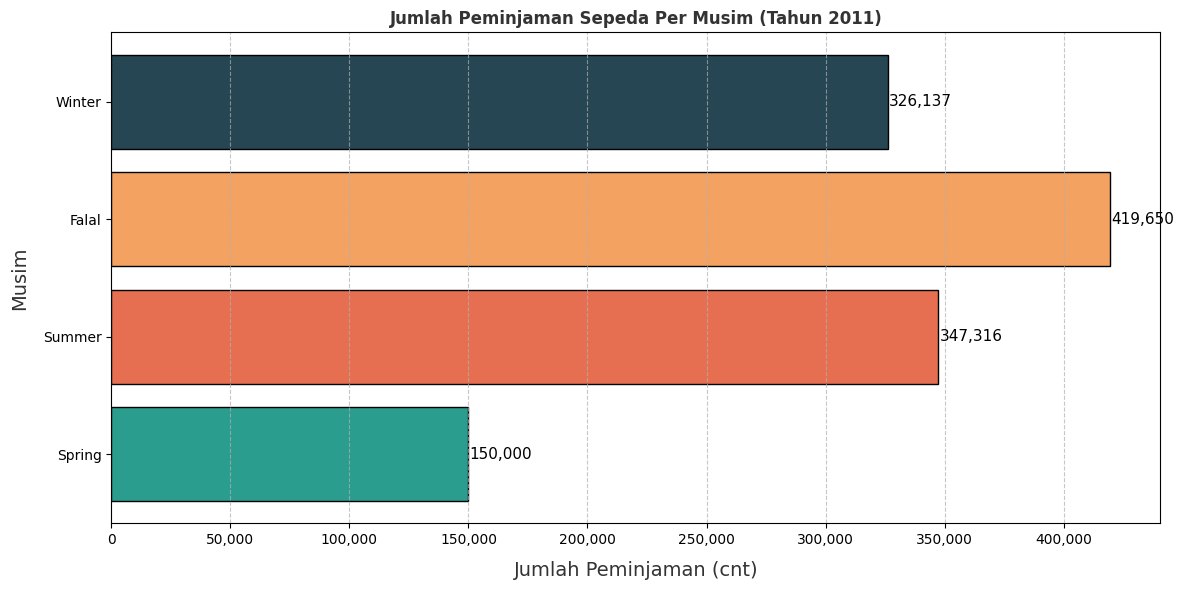

In [ ]:

tahun = "2011"
data_permusim_pertahun = data_per_musim[data_per_musim['year'].str.startswith(tahun)]

# Membuat figure tunggal
plt.figure(figsize=(12, 7))

# Warna kustom untuk batang
colors = ['#2a9d8f', '#e76f51', '#f4a261', '#264653']

# Plot horizontal bar chart
# 1:springer, 2:summer, 3:fall, 4:winter)
plt.figure(figsize=(12, 6))
bars = plt.barh(
    data_permusim_pertahun['season'].apply(lambda x:
              'Spring' if x in [1] else
              'Summer' if x in [2] else
              'Falal' if x in [3] else
              'Winter'),
    data_permusim_pertahun['cnt'],
    color=colors,
    edgecolor='black'
)

# Menambahkan nilai pada ujung batang
for bar in bars:
    plt.text(
        bar.get_width() + 500,
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width()):,}",
        va='center',
        fontsize=11,
        color='black'
    )

# Menambahkan garis grid horizontal
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menambahkan label dan judul
plt.title('Jumlah Peminjaman Sepeda Per Musim (Tahun 2011)', fontweight='bold', color='#333333')
plt.xlabel('Jumlah Peminjaman (cnt)', fontsize=14, labelpad=10, color='#333333')
plt.ylabel('Musim', fontsize=14, labelpad=10, color='#333333')

# Menyesuaikan tampilan ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Menyempurnakan layout
plt.tight_layout()
plt.show()


**Insight:**



*   Pada bagian ini kita dapat melihat visualisasi dari pertanyaan terkait dataset ini



## Conclusion

Dari data ini saya mau menganalisa untuk menemukan jawaban berikut:

*   Analisis Waktu (Tahun): Apakah terjadipeningkatan atau penurunan peminjaman sepeda antara tahun 2011 dan 2012? Apa yang mungkin menjadi penyebabnya?

    -Jumlah peminjam pada tahun 2012 naik sebesar  64.88%.
    -Terdapat perbedaan signifikan pada jumlah total peminjam, kemungkinan hal ini disebabkan penyewaan sepeda semakin dikenal oleh masyarakat luas.
*   Tren Pengguna Terdaftar vs. Kasual: Bagaimana perbandingan jumlah pengguna kasual dengan pengguna terdaftar di sepanjang tahun? Apakah ada perbedaan yang signifikan dalam pola peminjaman?

    -Pelanggan register lebih sering meminjam, mungkin disebabkan kebutuhan entah itu digunakan untuk ke transportasi umum atau pun pergi berbelanja


*   Pengaruh Cuaca: Bagaimana kondisi cuaca (clear, mist, rain, snow) memengaruhi jumlah peminjaman sepeda? Apakah ada jenis cuaca tertentu yang meningkatkan atau mengurangi peminjaman?

    -untuk pertanyaan ini kita dapat bahwa peminjam terbanyak pada cuaca clear sedangkan sedikit pada snow
*   Hari Kerja vs Akhir Pekan: Bagaimana perbedaan peminjaman sepeda antara hari kerja dan akhir pekan? Apakah akhir pekan memiliki lebih banyak pengguna kasual dibandingkan pengguna terdaftar?

    -Pada hari sabtu & minggu pelanggan casual akan terjadi peningkatan dimana hal ini di sebabkan hari tersebut merupakan hari libur


*   Tren Musiman: Bagaimana distribusi peminjaman sepeda pada setiap musim? Apakah ada pola yang jelas dalam peminjaman sepeda selama musim semi, panas, gugur, dan dingin?

    -Kita dapat melihat terdapat pola dimana saat season = 3 (fall) akan terjadi titik tertinggi peminjam baik casual maupun registered & titik terendah pada saat season = 1 (spring) dan
